This dataset consist of 375,000+ Kickstarter projects from 2009 to 2017, including project name, category, launch date, deadline, goal, amount pledged, number of backers, ,state, and country.

For this project, I will be assuming the role of an analyst at an investment firm that invest in early stage entrepreneurs. The partners have asked me to analyze Kickstarter projects to understand factors that lead to a project taking off. My task is to share a single page visual of a dashboard that provides data-driven recommendations for the types of projects they should be looking at for future success.

###### **DATASET DICTIONARY** -
###### Field -Description
###### ID - Internal kickstarter Id
###### Name - Name of project
###### Category - Project category
###### Subcategory - Project subcategory
###### Country - Country the project is from
###### Launched - Date the project was launched
###### Deadline - Deadline Date for drowdfunding
###### Goal - Amount of money the creator needs to complete the project (USD)
###### Pledged - Amount of money pledged by the crowd (USD)
###### Backers - Number of backers
###### State - Current condition the project is in (as of 2018-01-02)

RECOMMENDED ANALYSIS:
1) Which category has the highest success percentage? How many projects have been successful?
2) What project with a goal over $1,000 USD, had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged?
3) Can you identify any trends in project success rates over the years?
4) As an investor, what types of projects should you be looking at to guarantee future success?

I will be importing the necessary libraries and setting my desired options for analysis of this dataset.

###### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")
import os

**DATA IMPORTING:**

I will search my computers directory to locate the file that will be used for analysis.



###### **Checking Current Working Directory**

In [3]:
os.getcwd()

'c:\\Users\\mjaso\\OneDrive'

###### **Finding the Correct File**

In [4]:
os.listdir('c:\\Users\\mjaso\\Downloads\\Kickstarter+Projects')

['kickstarter_projects.csv', 'kickstarter_projects_data_dictionary.csv']

Now that I have located the correct file, I can now read this file into a dataframe.

###### **Creating a Pandas DataFrame**

In [5]:
kickstarter_projects = pd.read_csv(r'c:\\Users\\mjaso\\Downloads\\Kickstarter+Projects\\kickstarter_projects.csv')

**DATA EXAMINATION:**

I first want to see how big the dataset the dataset that I am working with is.

###### **Checking the number of rows and columns**

In [6]:
row = kickstarter_projects.shape[0]
col = kickstarter_projects.shape[1]
print(f"There are {row} rows and {col} columns of of values in this dataset.") 

There are 374853 rows and 11 columns of of values in this dataset.


I will now check the consistency of the data by checking the first and last 5 rows of the dataframe.

###### **Checking the First 5 Rows of the DataFrame**

In [7]:
kickstarter_projects.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


###### **Checking the Last 5 Rows of the DataFrame**

In [8]:
kickstarter_projects.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02 15:02:31,2018-01-26,24274,4483,82,Live


To gain a better understanding of the data, I will look at some statistical information in regards to the columns.

###### **Checking the statistical values of the numerical columns**

In [9]:
kickstarter_projects.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


###### **Checking the statistical values of the categorical columns**

In [10]:
kickstarter_projects.describe(include="object")

,Name,Category,Subcategory,Country,Launched,Deadline,State
count,374853,374853,374853,374853,374853,374853,374853
unique,372061,15,159,22,374297,3164,5
top,New EP/Music Development,Film & Video,Product Design,United States,2014-06-06 16:16:32,2014-08-08,Failed
freq,13,62694,22310,292618,2,702,197611


Checking the statistical values of the columns gives me a better understanding of the data that I'm working with. In this case, I am able to extablish the most popular category, subcategory and state of each project.

Now I will check to make sure that the datatypes for each column are the correct datatypes, this is an important step because it ensures accuracy during data analysis.

###### **Checking the DataTypes**

In [11]:
kickstarter_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


**DATA CLEANING:**

The 'Launched' and 'Deadline' columns both have the incorrect datatypes associated with them. Also, the 'Launched' column has the time included in its value. I will have to convert both columns to the correct 'datetime' datatypes. I will also create a new column named 'Launch Hour', that will be filled with the extracted hour data from the 'Launched' column. 

###### **Converting the 'Launched' and 'Deadline' columns to 'datetime' datatypes**

In [12]:
kickstarter_projects["Launched"] = pd.to_datetime(kickstarter_projects["Launched"])
kickstarter_projects["Deadline"] = pd.to_datetime(kickstarter_projects["Deadline"])

The columns 'Launched' and 'Deadline' are now in the 'datetime' format. I will now verify my changes.

In [13]:
kickstarter_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


Perfect, the targeted columns datatypes have been updated.

Now I will create a column named 'Launch Hour' and 'Launch Year' with the hour and year value from the 'Launched' column.

###### **Creating a new column**

In [14]:
kickstarter_projects["Launch Hour"] = kickstarter_projects["Launched"].dt.hour 
kickstarter_projects["Launch Year"] = kickstarter_projects["Launched"].dt.year 

Now that I have successfully created the new column, I can verify that the changes are reflected.

###### **Checking the first 10 rows of the 'Launch Hour' column**

In [15]:
kickstarter_projects["Launch Hour"].head()

0    21
1     0
2    21
3    17
4    14
Name: Launch Hour, dtype: int64

In [16]:
kickstarter_projects["Launch Year"].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: Launch Year, dtype: int64

I will now check this dataframe for any duplicate rows of data.

###### **Checking for duplicate rows of data**

In [17]:
duplicates = kickstarter_projects.duplicated().sum()
print(f"There are {duplicates} rows duplicated data within this dataframe.") 

There are 0 rows duplicated data within this dataframe.


I will also check the number of null and unique values per column, this is also valuable information in regards to later analysis.

###### **Checking for null values**

In [18]:
for null in kickstarter_projects.columns:
    na_val = kickstarter_projects[null].isnull().sum()
print(f"There are {na_val} Null values in the column {null}.") 

There are 0 Null values in the column Launch Year.


In [19]:
for u in kickstarter_projects.columns:
    u_val = kickstarter_projects[u].nunique()
    print(f"The column {u} has {u_val} unique values.") 

The column ID has 374853 unique values.
The column Name has 372061 unique values.
The column Category has 15 unique values.
The column Subcategory has 159 unique values.
The column Country has 22 unique values.
The column Launched has 374297 unique values.
The column Deadline has 3164 unique values.
The column Goal has 27692 unique values.
The column Pledged has 39989 unique values.
The column Backers has 3963 unique values.
The column State has 5 unique values.
The column Launch Hour has 24 unique values.
The column Launch Year has 10 unique values.


**RECOMMENDED ANALYSIS:**

1) Which category has the highest success percentage? How many projects have been successful?

I will answer this question by first finding the values for all categories where the state is successful. I will then calculate the sum of all of those values, divide each value by that sum and multiply that by 100 to find the percentage of each category.

In [34]:
success_category = kickstarter_projects[kickstarter_projects["State"] == "Successful"]["Category"].value_counts().reset_index()
success_category = success_category.rename(columns={"index": "Category",
                                 "Category": "Count of Category"})

sum = success_category["Count of Category"].sum()
percentage_of_category = (success_category["Count of Category"] / sum) * 100
percentage_of_category = round(percentage_of_category.reset_index(), 1)
percentage_of_category = percentage_of_category.rename(columns={"Count of Category": "Percentage"})

success_category["Success Percentage"] = percentage_of_category["Percentage"]
print(success_category, "\n", """
      The projects that have had the higeset success percentage have been in the categories of Music, Film & Video, Games, Publishing, Art, and Design. Having a success percentage over 5 percent.""") 

        Category  Count of Category  Success Percentage
0          Music              24105                18.0
1   Film & Video              23612                17.6
2          Games              12518                 9.4
3     Publishing              12300                 9.2
4            Art              11510                 8.6
5         Design              10549                 7.9
6        Theater               6534                 4.9
7     Technology               6433                 4.8
8           Food               6085                 4.5
9         Comics               5842                 4.4
10       Fashion               5593                 4.2
11   Photography               3305                 2.5
12         Dance               2338                 1.7
13        Crafts               2115                 1.6
14    Journalism               1012                 0.8 
 
      The projects that have had the higeset success percentage have been in the categories of Music,

2) What project with a goal over $1,000 USD, had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged?

In order to complete this question, I first need to retrieve the 'Name', 'Goal', and 'Pledged' columns and filter them by the Goal being greater than $1000 and store the values in a seperate dataframe named 'kick_start'. Next, I will calculate the goal completion by dividing the values in the 'Pledged' column by the values in the 'Goal' column and store the results in a variable named 'goal_percentage'. Then I will create a new column for the 'kick_start' dataframe named 'Goal Completion Percentage' with the values of the 'goal_percentage' variable. Lastly, I will sort the 'kick_start' dataframe by the newly created column 'Goal Completion Percentage' in desc order and store the top 100 values in a dataframe named 'top_100_biggest_goal_completion'.

In [36]:
kick_start = kickstarter_projects[kickstarter_projects["Goal"] > 1000][["Name", "Goal", "Pledged"]].sort_values(by="Goal", ascending=False).reset_index()
kick_start

goal_percentage = kick_start["Pledged"] / kick_start["Goal"] 

kick_start["Goal Completion Percentage"] = round(goal_percentage, 2)

top_100_biggest_goal_completion = kick_start.sort_values(by="Goal Completion Percentage", ascending=False)[:100].reset_index()
del top_100_biggest_goal_completion["level_0"]

top_100_biggest_goal_completion

,index,Name,Goal,Pledged,Goal Completion Percentage
0,194479,Exploding Kittens,10000,8782572,878.26
1,234713,The World's Best TRAVEL JACKET with 15 Feature...,20000,9192056,459.60
2,305209,Fidget Cube: A Vinyl Desk Toy,15000,6465690,431.05
3,272578,Joking Hazard,10000,3246589,324.66
4,312492,Bears vs Babies - A Card Game,10000,3215680,321.57
5,151239,COOLEST COOLER: 21st Century Cooler that's Act...,50000,13285226,265.70
6,335360,ClickPack Pro | The Best Functional Anti-theft...,5000,1206179,241.24
7,317136,Redefining Italian Luxury Watches - Filippo Lo...,20878,5020667,240.48
8,344563,SMART BELT - Kevlar® Core Indestructible & Mic...,5000,1174805,234.96
9,340127,"Gravity: The Weighted Blanket for Sleep, Stres...",21500,4729263,219.97


3) Can you identify any trends in project success rates over the years?

In [117]:
project_success = kickstarter_projects[kickstarter_projects["Goal"] > 1000][["Name", "Goal", "Pledged", "Category", "Launch Year"]].sort_values(by="Goal", ascending=False).reset_index()

goal_percentage = project_success["Pledged"] / project_success["Goal"]

project_success["Goal Completion Percentage"] = round(goal_percentage, 2)

biggest_goal_completion = project_success.sort_values(by="Goal Completion Percentage", ascending=False).reset_index()
del biggest_goal_completion["level_0"]

biggest_goal_completion

top_year_trends_project_success = biggest_goal_completion.groupby(["Category", "Launch Year"])[["Category", "Launch Year"]].value_counts().reset_index()
top_year_trends_project_success = top_year_trends_project_success.rename(columns={0: "Count of Success"})

year_trends_project_success_by_category_year = top_year_trends_project_success.groupby(["Category", "Launch Year"])["Count of Success"].max().reset_index()
year_trends_project_success_by_category_year

print("The DataFrame below displays the number of successful Categories by Launch Year.", "\n", year_trends_project_success_by_category_year)

The DataFrame below displays the number of successful Categories by Launch Year. 
          Category  Launch Year  Count of Success
0             Art         2009               119
1             Art         2010               655
2             Art         2011              1785
3             Art         2012              2663
4             Art         2013              2648
5             Art         2014              3457
6             Art         2015              3645
7             Art         2016              2521
8             Art         2017              2386
9             Art         2018                 5
10         Comics         2009                20
11         Comics         2010               210
12         Comics         2011               452
13         Comics         2012               940
14         Comics         2013              1170
15         Comics         2014              1298
16         Comics         2015              1519
17         Comics         2016     

In [113]:
top_year_trends_project_success = top_year_trends_project_success.groupby("Category")[["Launch Year", "Count of Success"]].max().sort_values(by="Count of Success", ascending=False)
top_year_trends_project_success

print("The DataFrame below displays the year that a particular Category had the most number of successful projects.", "\n", top_year_trends_project_success)

The DataFrame below displays the year that a particular Category had the most number of successful projects. 
               Launch Year  Count of Success
Category                                   
Technology           2018              9007
Film & Video         2018              8476
Music                2018              7343
Games                2018              6230
Design               2018              6059
Publishing           2018              5997
Food                 2018              5510
Fashion              2018              4458
Art                  2018              3645
Photography          2018              1831
Crafts               2018              1711
Comics               2018              1519
Theater              2018              1504
Journalism           2018              1207
Dance                2017               584


4) As an investor, what types of projects should you be looking at to guarantee future success?

As an investor, I would recommend looking into projects that fall in the Film & Video, Music, Publishing, Technology, Games, and Designs categories. According to the data, the most number of successful projects have been in the Film & Video category, while also having a 17.6% success rate. The second most number of successful projects have been in the Music category, having a success rate of 18.0%. The third number of successful projects have been in the Publishing category with a success rate of 9.2%. The fourth number of successful projects have been in the Technology category, having a success rate of 4.8%. The fifth number of successful projects have been in the Games category with a success rate of 9.4%. Lastly, the sixth number of successful projects have been in the Designs category, having a 7.9% success rate.

Below I will visualize the total number of successful projects by category in a bar graph.

Projects by Category


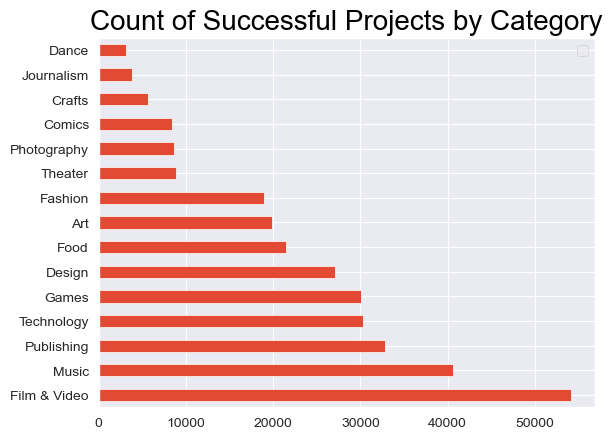

In [163]:
total_success_by_category = year_trends_project_success_by_category_year.groupby("Category")["Count of Success"].sum().reset_index().sort_values(by="Count of Success", ascending=False)
total_success_by_category = total_success_by_category.rename(columns={"Count of Success": "Total Success"}).reset_index()
del total_success_by_category["index"] 
total_success_by_category.plot(kind="barh")
plt.title("Count of Successful Projects by Category",
          fontsize=20,
          color="black")
plt.legend("") 
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
           ["Film & Video", "Music", "Publishing", "Technology", "Games", "Design", "Food", "Art", "Fashion", "Theater", "Photography", "Comics", "Crafts", "Journalism", "Dance"])
print("Projects by Category") 
